The purpose of this notebook is to perform analysis for the Best Service International Case Study

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [5]:
data_folder = "../Data" #defining a relative path to the data file
excel_file_path = os.path.join(data_folder, "Best Service International Sales Data.xlsx") #Construct a full path including the Excel file

excel_file = pd.ExcelFile(excel_file_path)
print('The names of the sheets in the file are as follows:', excel_file.sheet_names)

The names of the sheets in the file are as follows: ['Sales Data', 'PTT Lead Data', 'Staff List']


In [6]:
dfs = pd.read_excel(excel_file_path, sheet_name=None)
print('The Sales Data table looks as follows')
print(dfs['Sales Data'].head())
print()
print('The Portfolio Tracker Tool table looks as follows')
print(dfs['PTT Lead Data'].head())
print()
print('The Staff List table looks as follows')
print(dfs['Staff List'].head())

The Sales Data table looks as follows
    Sale Date  Cell Number Sale Consultant Employee Number        Province  \
0  2020/01/02    721585874                         D194371  Not Applicable   
1  2020/01/02    835550504                         D194371  Not Applicable   
2  2020/01/02    614651899                         D194371  Not Applicable   
3  2020/01/02    717053334                         D194371  Not Applicable   
4  2020/01/02    825127720                         D194371  Not Applicable   

           Branch           Lead Source conditions          Product Range  \
0  Not Applicable  Proactive Engagement         No  Savings & Investments   
1  Not Applicable  Proactive Engagement        Yes  Savings & Investments   
2  Not Applicable  Proactive Engagement        Yes  Savings & Investments   
3  Not Applicable  Proactive Engagement         No  Savings & Investments   
4  Not Applicable  Proactive Engagement        Yes  Savings & Investments   

  Concluded   Valid Sale?  
0 

In [7]:
print('The Sales Data table has ', dfs['Sales Data'].shape[0], ' rows')
print('The Portfolio Tracker Tool table has ', dfs['PTT Lead Data'].shape[0], ' rows')
print('The Staff List table has ', dfs['Staff List'].shape[0], ' rows')

The Sales Data table has  12018  rows
The Portfolio Tracker Tool table has  360329  rows
The Staff List table has  37  rows


In [8]:
print(dfs['Sales Data'].sample(n=15))

        Sale Date  Cell Number Sale Consultant Employee Number  \
5045   2020/02/27    848911975                         D184243   
2267   2020/01/27    843212114                         D214405   
2868   2020/01/31    726601742                         D219016   
11939  2020/12/24    848375114                         D198743   
11248  2020/11/18    825642309                         D227647   
752    2020/01/09    724645041                         D194371   
8868   2020/07/02    724343217                         D216280   
1335   2020/01/14    711368435                         D217107   
5362   2020/03/03    818453077                         D215099   
7729   2020/04/29    832337389                         D215606   
5017   2020/02/27    835252953                         D215074   
8553   2020/06/12    821639733                         D216280   
11965  2020/12/28    834396143                         D215604   
108    2020/01/03    726555260                         D217055   
5715   202

In order to make the data faster to work with, I will use only the fields I think are important in the Sales Data table. This means dropping the Province, Branch, and Concluded fields. The necessary fields will be added to a new data frame called salesData

In [10]:
selected_col = ['Sale Date', 'Sale Consultant Employee Number', 'Product Range', 'Valid Sale?']
salesData = dfs['Sales Data'][selected_col]
print(salesData.sample(n=15))

        Sale Date Sale Consultant Employee Number          Product Range  \
8842   2020/06/30                         D215474              Insurance   
340    2020/01/06                         D217092        Current Account   
2180   2020/01/24                         D217107                   Loan   
7543   2020/04/16                         D215074                   Loan   
11799  2020/12/14                         D198743                   Loan   
2020   2020/01/22                         D219016  Savings & Investments   
3920   2020/02/13                         D122609  Savings & Investments   
1980   2020/01/22                         D214405  Savings & Investments   
292    2020/01/06                         D215074  Savings & Investments   
6820   2020/03/23                         D184243        Current Account   
2380   2020/01/28                         D122609  Savings & Investments   
4882   2020/02/26                         D197761              Insurance   
10510  2020/

In [11]:
from IPython.display import display #this is so that we can use display to view the tables in a more presentable manner

display(salesData.sample(n=20))

,Sale Date,Sale Consultant Employee Number,Product Range,Valid Sale?
11502,2020/11/30,D195038,Loan,Valid Sale
5123,2020/02/28,D215604,Insurance,Valid Sale
1164,2020/01/13,D215074,Current Account,Valid Sale
4285,2020/02/18,D215099,Savings & Investments,Valid Sale
7133,2020/03/30,D122609,Savings & Investments,Valid Sale
5898,2020/03/10,D217104,Savings & Investments,Valid Sale
7125,2020/03/30,D216360,Savings & Investments,Invalid Sale
9824,2020/09/14,D215473,Loan,Valid Sale
193,2020/01/03,D223172,Insurance,Valid Sale
6862,2020/03/23,D227647,Savings & Investments,Valid Sale


In [12]:
display(dfs['PTT Lead Data'].sample(n=20))

,Cell Number,Month,Sale Consultant Employee Number,Customer Location
218857,839035734,Aug,D215604,Mpumalanga
241781,794882381,Sep,D195038,Free State
283622,826762594,Oct,D215074,Free State
112594,794231005,Apr,D226001,Mpumalanga
328697,827806764,Nov,D219016,Kwazulu Natal
209304,717987626,July,D215608,Gauteng
47492,717409566,Feb,D215474,Kwazulu Natal
227534,797760683,Aug,D215474,Free State
229877,718120465,Aug,D223172,Kwazulu Natal
88336,824342397,Mar,D215074,Northern Cape


In [13]:
selected_col = ['Month', 'Sale Consultant Employee Number']
leadData = dfs['PTT Lead Data'][selected_col]
display(leadData.sample(n=15))

,Month,Sale Consultant Employee Number
191138,July,D223172
42952,Feb,D215608
229392,Aug,D184243
143384,May,D215606
92708,Apr,D195038
283954,Oct,D216280
88443,Mar,D217093
141964,May,D215608
288686,Oct,D215097
215160,Aug,D215099


In [15]:
selected_col = ['Name ','Employee Number','Team Leader ']
staffData = dfs['Staff List'][selected_col]
display(staffData.sample(n=15))

,Name,Employee Number,Team Leader
19,Merle Brotzman,D216060,Sarah Jacobs
25,Lorine Decosta,D216360,John Smith
3,Martha Frechette,D226001,Jessica Grove
1,Asley Loch,D198743,Thabo Matangu
34,Herminia Malsam,D127811,Jessica Grove
18,Shenna Charleston,D214430,Bonolo Tshube
5,Julee Oler,D215099,John Smith
22,Yon Coelho,D218882,Bonolo Tshube
32,Armand Theobald,D215608,John Smith
14,Laurie Cammack,D217092,Bonolo Tshube


In [16]:
groupedPTT = leadData.groupby(['Sale Consultant Employee Number', 'Month'])
countGroups = groupedPTT.size()
countGroupsDF = countGroups.reset_index(name='Counts')

display(countGroupsDF)

,Sale Consultant Employee Number,Month,Counts
0,D122609,Apr,850
1,D122609,Aug,763
2,D122609,Dec,789
3,D122609,Feb,847
4,D122609,Jan,789
...,...,...,...
441,D235282,Mar,776
442,D235282,May,798
443,D235282,Nov,836
444,D235282,Oct,740


Above the lead data has been grouped by employee number, then by the months, and there is a count for how many leads have been assigned per employee for every month. This data can help answer the following questions:
1. We can compare the count for number of leads to the sales attempted and valid sales
2. We can confirm that every employee has been allocated a reasonale amount of leads for every month
3. This is an edge case, but we can explore if there is any correlation between the number of leads and sales made (valid or overall)

In [20]:
groupedLeadData = countGroupsDF.dropna() #this is to remove any invalid entries
display(groupedLeadData)

,Sale Consultant Employee Number,Month,Counts
0,D122609,Apr,850
1,D122609,Aug,763
2,D122609,Dec,789
3,D122609,Feb,847
4,D122609,Jan,789
...,...,...,...
441,D235282,Mar,776
442,D235282,May,798
443,D235282,Nov,836
444,D235282,Oct,740


In [22]:
employees = groupedLeadData['Sale Consultant Employee Number'].unique()
print(len(employees))

37


In [24]:
37 * 12

444

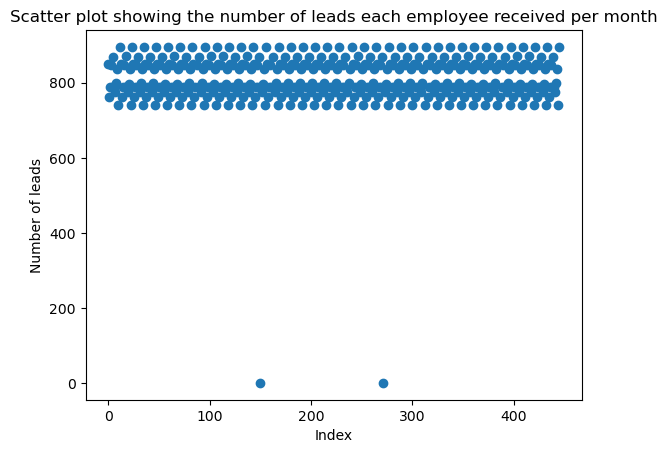

In [26]:
plt.scatter(groupedLeadData.index, groupedLeadData['Counts'])
plt.xlabel('Index')
plt.ylabel('Number of leads')
plt.title('Scatter plot showing the number of leads each employee received per month')
plt.show()

In [28]:
display(groupedLeadData[groupedLeadData['Counts'] < 200])

,Sale Consultant Employee Number,Month,Counts
150,D214405,July,1
271,D215608,July,1


In [30]:
display(groupedLeadData[groupedLeadData['Sale Consultant Employee Number'] == 'D214405'])

,Sale Consultant Employee Number,Month,Counts
144,D214405,Apr,850
145,D214405,Aug,763
146,D214405,Dec,788
147,D214405,Feb,846
148,D214405,Jan,789
149,D214405,July,869
150,D214405,July,1
151,D214405,Jun,788
152,D214405,Mar,776
153,D214405,May,797


In [32]:
display(groupedLeadData[groupedLeadData['Sale Consultant Employee Number'] == 'D215608'])

,Sale Consultant Employee Number,Month,Counts
265,D215608,Apr,850
266,D215608,Aug,763
267,D215608,Dec,788
268,D215608,Feb,846
269,D215608,Jan,789
270,D215608,July,869
271,D215608,July,1
272,D215608,Jun,788
273,D215608,Mar,776
274,D215608,May,797


From the above it is clear that each employee received upward of 700 leads monthly, and the only months that show otherwise are a mistake that happens for the month of July, twice.

In [39]:
groupedStaffData = staffData.groupby('Team Leader ')
countGroups = groupedStaffData.size()
employeesPerLead = countGroups.reset_index(name='Employees per team')

display(employeesPerLead)

,Team Leader,Employees per team
0,Bonolo Tshube,8
1,Jessica Grove,4
2,John Smith,13
3,Sarah Jacobs,9
4,Thabo Matangu,3


We can see from the above that the team sizes are not equal, if we are to compare the performance of each team we need to find an average amount as the data may possibly be skewed by team size

Useful data structures:
1. employeesPerLead
2. staffData
3. salesData

In [44]:
display(salesData.sample(n=20))

,Sale Date,Sale Consultant Employee Number,Product Range,Valid Sale?
3183,2020/02/04,D176968,Savings & Investments,Valid Sale
1490,2020/01/15,D215474,Savings & Investments,Invalid Sale
2169,2020/01/24,D214405,Savings & Investments,Valid Sale
2833,2020/01/31,D226001,Credit Card,Valid Sale
1139,2020/01/13,D216360,Savings & Investments,Valid Sale
2695,2020/01/30,D205062,Savings & Investments,Valid Sale
186,2020/01/03,D217092,Savings & Investments,Valid Sale
4933,2020/02/26,D198743,Credit Card,Invalid Sale
11709,2020/12/08,D215604,Insurance,Valid Sale
4395,2020/02/19,D235282,Loan,Valid Sale


Trends that we will be exploring for the sales data:
1. Counting the sales per employee per month (compare to baseline assuming 3 sales per day)(visual)
2. Sales validity per product range (visual to compare)
3. Exploring sales per day and the correlation between that and the team lead

In [57]:
#salesData['Sale Date'] = pd.to_datetime(salesData['Sale Date']) this threw an error
salesData.loc[:, 'Sale Date'] = pd.to_datetime(salesData['Sale Date']) #this is a second attempt at converting the date to a datetime